<a href="https://colab.research.google.com/github/KamiriTech/Machine-Learning-/blob/main/Bayes_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# load Dataset

In [2]:
import pandas as pd

# Replace with the actual path to your dataset
file_path = "/content/gdrive/MyDrive/Datasets/spam.csv"

# Load the dataset
df = pd.read_csv(file_path, encoding='latin-1')

# Display first few rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Data pre-procesing

We start be removing the unnecessary columns

In [3]:
# Keeping only label and message columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to binary (spam = 1, ham = 0)
df.loc[:, 'label'] = df['label'].map({'ham': 0, 'spam': 1})


df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
# Count occurrences of each label (ham and spam)
label_counts = df['label'].value_counts()

# Display the result
print(label_counts)


label
0    4825
1     747
Name: count, dtype: int64


#split the data into a training set and test set

In [6]:
from sklearn.model_selection import train_test_split
df['label'] = pd.to_numeric(df['label']) # Convert 'label' column to numeric type

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}")


Training size: 4457, Testing size: 1115


#Convert text to numerical values

ML algorithms (including Naïve Bayes) use mathematical computations like dot products and probability distributions. Text data needs to be converted into a numerical format so that these operations can be performed.

CountVectorizer is a method in scikit-learn that converts text into a matrix of token (word) counts. It follows a Bag-of-Words (BoW) approach, meaning it ignores word order and only considers word frequency.

In [7]:
#convert text to numerical features
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [9]:
# Predict on test data
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#Interpreating the results

**Accuracy**= 98%

**Precision** (Spam = 0.96, Ham = 0.99)
Precision measures how many messages predicted as spam were actually spam.
A precision of 0.96 for spam means 4% of the messages predicted as spam were actually not spam (false positives).

**Recall **(Spam = 0.92, Ham = 0.99)
Recall measures how many actual spam messages were correctly identified.
A recall of 0.92 for spam means 8% of actual spam messages were missed (false negatives).

**F1-score **(Spam = 0.94, Ham = 0.99)
The F1-score balances precision and recall.
A spam F1-score of 0.94 suggests the model performs well in detecting spam.

**Macro Average** (0.97, 0.96, 0.96)
Simply the average of both classes (ham and spam).
Does not consider class imbalance.

**Weighted Average** (0.98, 0.98, 0.98)
Adjusts for class imbalance by giving more weight to the ham class (which has more samples).
Since most messages are ham, this average is close to the ham class metrics.

**NOTE:** Check the formulas in our lecture 2 notes

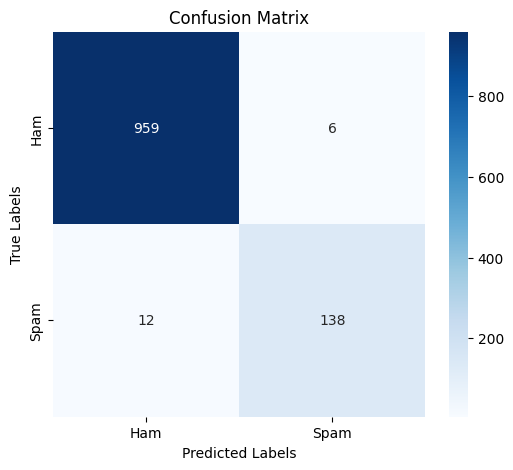

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
